# Evaluating White Wine Dataset

### Introduction

The winemaking process involves steps in which fermentation, lactic acid and ethanol production occur (Lonvaud-Funel, 1999). Components, such as sugar levels and citric acid, are known to affect the quality of wine. Physicochemical — density, alcohol, pH value, etc. — and sensory tests were performed by researchers and oenologists on samples of red and white *vinho verde* wine in the Cortez et al. study from 2009. This project will use the data containing white wine evaluations as it contains a larger dataset.
   
The study by Cortez et al. found that the two most dominant factors in determining the quality of wine were sulphates and alcohol. The project aims to find whether or not that is the case or if there is a possibility that other factors were not originally considered. 


### Preliminary Exploratory Data Analysis

In [1]:
### Run this cell before continuing
library(tidyverse)
library(repr)
#setting seed

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

download.file(url, destfile = "winequality-white.csv")
white_wine <- read_delim("winequality-white.csv", delim = ";")
white_wine

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


In [3]:
cortez <- white_wine |>
        select(sulphates, alcohol, quality)
cortez

sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>
0.45,8.8,6
0.49,9.5,6
0.44,10.1,6
0.40,9.9,6
0.40,9.9,6
0.44,10.1,6
0.47,9.6,6
0.45,8.8,6
0.49,9.5,6


In [4]:
summarized_sulphates <- cortez |>
                   summarise(sulphate_mean = mean(sulphates),
                             highest_sulphate = max(sulphates),
                             lowest_sulphate = min(sulphates))
summarized_sulphates

sulphate_mean,highest_sulphate,lowest_sulphate
<dbl>,<dbl>,<dbl>
0.4898469,1.08,0.22


In [5]:
summarized_alcohol <- cortez |>
                   summarise(alcohol_mean = mean(alcohol),
                             highest_alcohol = max(alcohol),
                             lowest_quality = min(alcohol))
summarized_alcohol

alcohol_mean,highest_alcohol,lowest_quality
<dbl>,<dbl>,<dbl>
10.51427,14.2,8


In [6]:
summarized_quality <- cortez |>
                      summarise(quality_mean = mean(quality),
                                highest_quality = max(quality),
                                lowest_quality = min(quality))
summarized_quality

quality_mean,highest_quality,lowest_quality
<dbl>,<dbl>,<dbl>
5.877909,9,3


In [7]:
quality_count <- cortez |>
                 group_by(quality) |>
                 summarize(count = n())
quality_count

quality,count
<dbl>,<int>
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


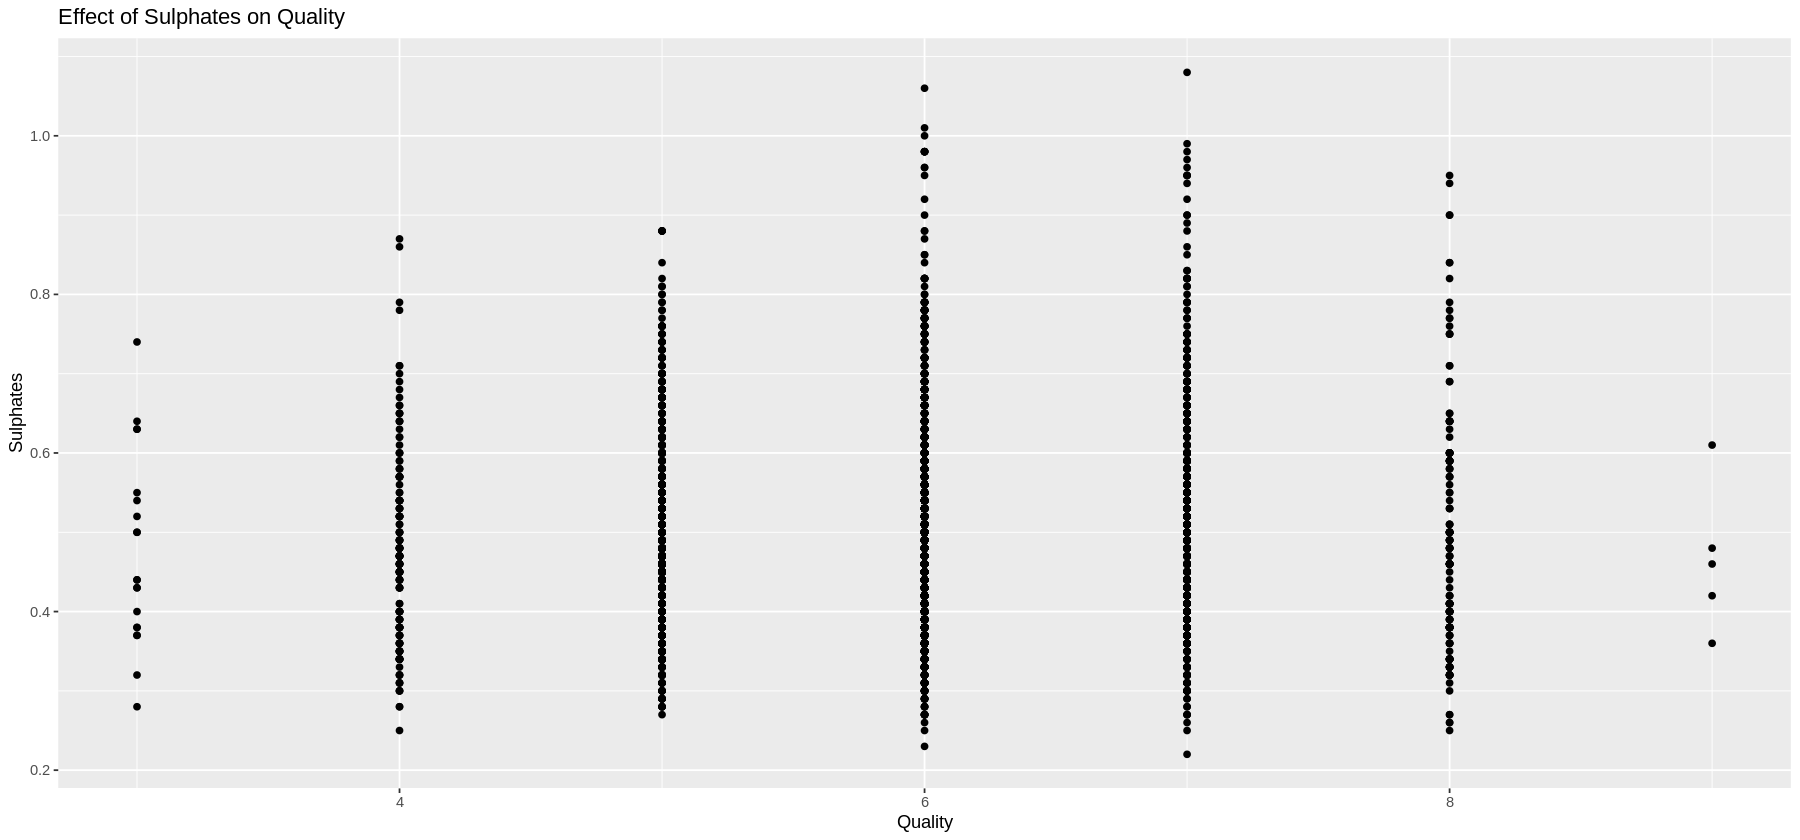

In [8]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(cortez, aes(x = quality, y = sulphates)) +
geom_point() +
xlab("Quality") +
ylab("Sulphates") +
ggtitle("Effect of Sulphates on Quality")

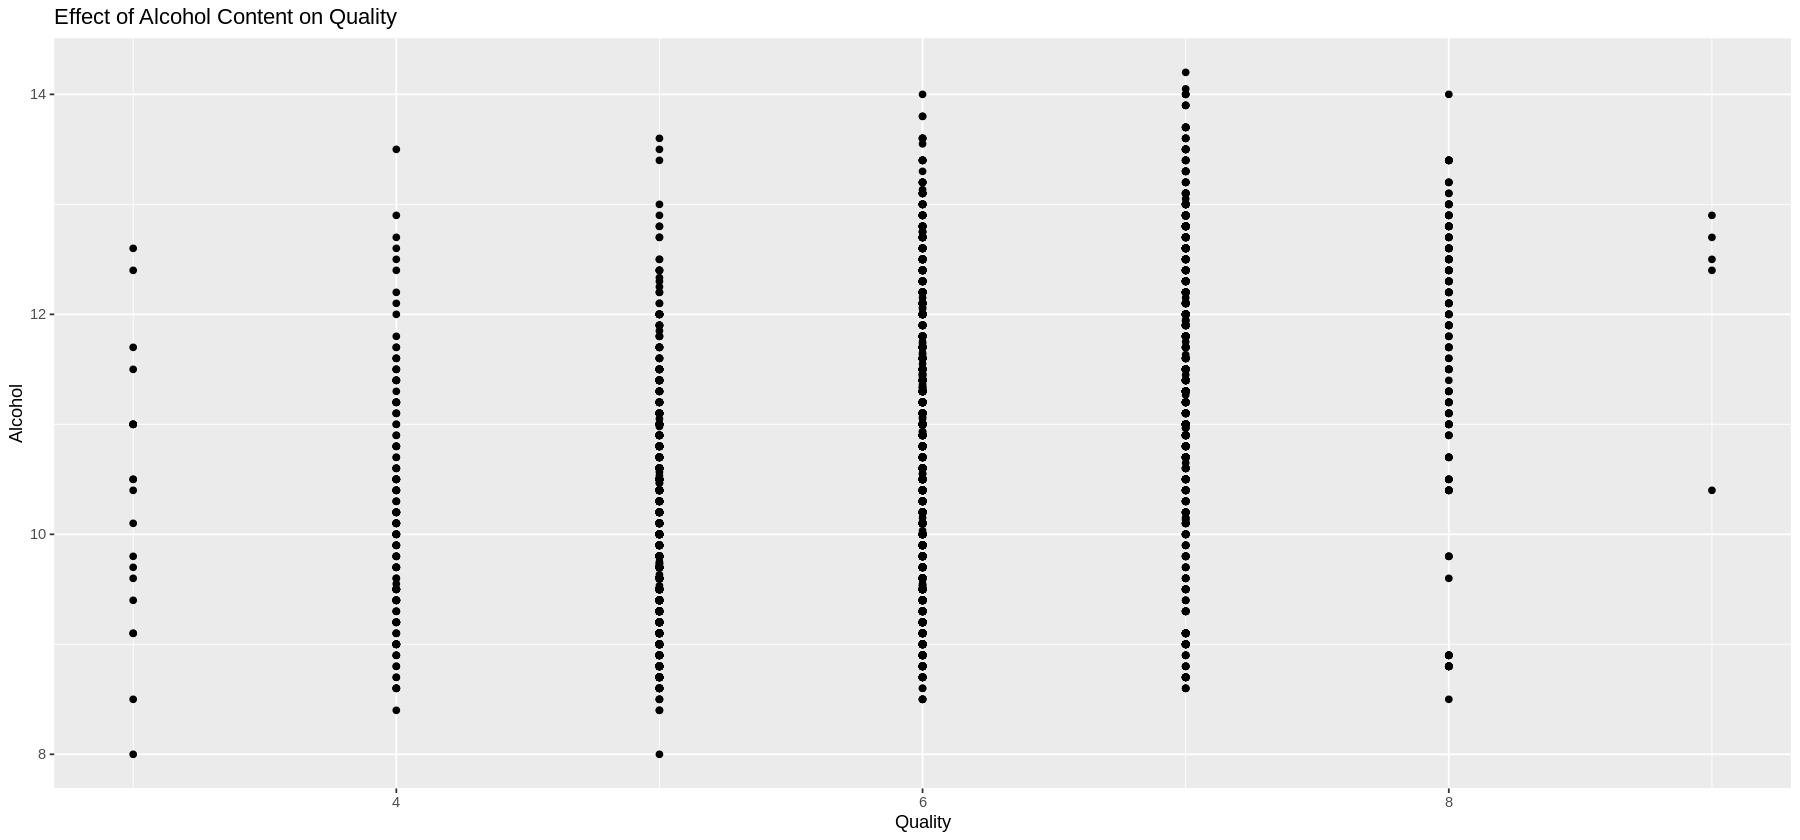

In [9]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(cortez, aes(x = quality, y = alcohol)) +
geom_point() +
xlab("Quality") +
ylab("Alcohol") +
ggtitle("Effect of Alcohol Content on Quality")

### Methods
The original data set included twelve columns of various physical and chemical components associated with wine. Just as before, the Cortez et al. wine study showed that the two most important factors in determining wine quality were sulphates and alcohol, so they will be the focus of our study.

Though the predictors for this project were decided on the findings in Cortez et al., a further visual and statistical analysis will be conducted to solidify our choice of predictors. 
We have included the mean, minimum and maximum values for both of the chosen predictors, as well as quality. The values achieved are for training data, while the predictions that we will make will come from the testing data. 

For visualization, the scatterplots for "Effect of Sulphates on Quality" and "Effect of Alcohol Content on Quality" were made as a visualization, seeing as they are all quantitative variables. 

We plan to obtain our results with a predictive analysis, using K-nearest classification on the training data. We aim to conduct the analysis using scatterplots. 

### Expected Outcomes and Significance
Portugal is one of the leading countries in wine production in the world (Chepkemoi, 2023). Exports of its *vinho verde* wine has increased by 36% from 1997 to 2007. Physicochemical and sensory analysis is essential in the development and improvement of wine quality, in order to compete in the global wine industry. The expected outcome of this project is to find that sulphates and alcohol content have the most impact in determining the quality of white wine. 

The importance of wine quality has rapidly increased due to consumer demand, following the pandemic. With this, comes the increase in expectations in the quality of wine. Finding the key variables in determining wine quality will aid companies in the development of technology that will allow for the increased production of high-quality wine, in order to satisfy consumers' needs. Research has shown that drinking one or two glasses of wine increases antioxidants called polyphenols, which may help protect the lining of blood vessels in the heart, allowing for cardiovascular protection (Blanch and Ros, 2012). The outcomes of this project could lead to future questions regarding other benefits of drinking higher quality wine, and whether the components present in high-quality wine have additional benefits.


### Sources

Original Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

 Blanch, Gemma, et al. “Effects of Red Wine Polyphenols and Alcohol on Glucose Metabolism and the Lipid Profile: A Randomized Clinical Trial.” Clinical Nutrition (Edinburgh, Scotland), U.S. National Library of Medicine, https://pubmed.ncbi.nlm.nih.gov/22999066/. 
 
 Chepkemoi, Joyce Chepkemoi. “Top 10 Wine Producing Countries in the World 2021.” Wine   Producing Countries 2023, https://worldpopulationreview.com/country-rankings/wine-producing-countries.
 
 Cortez, Paulo; Cerdeira, A.; Almeida, F.; Matos, T.; Reis, J. Modeling Wine Preferences by Data Mining from Physicochemical Properties. Decision Support Systems 2009, 47 (4), 547–553.

 Lonvaud-Funel, A. Lactic Acid Bacteria in the Quality Improvement and Depreciation of Wine. Lactic Acid Bacteria: Genetics, Metabolism and Applications 1999, 317–331.